# Análisis de la evolución de la población activa en España

Importamos bibliotecas necesarias:  
- pandas: para realizar los análisis de las bases de datos
- numpy: para trabajar con matrices
- matplotlib.pyplot: para trabajar con gráficas

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos la base de datos provenientes de la INE:

In [19]:
#DataFrame de la edad de la población
dataFramePobEdad = pd.read_csv('PobEdad.csv', delimiter=';')

Eliminamos aquellas filas que se traten del mes de julio, que no sean de ambos sexos y que no sea el total nacional para recortar el peso de ejecución, dejando sólamente los de enero de cada año.

Primero definimos una función que itere en cada row['Periodo'] y determine si contiene julio.

In [20]:
def esJulio(periodo):
    if 'julio' in periodo:
        return False
        
    return True

Aplicamos sobre dataFramePobEdad (mediante map) la función esJulio y la actualizamos.

In [21]:
dataFramePobEdad = dataFramePobEdad[dataFramePobEdad['Periodo'].map(esJulio)]

Ahora, sobre este, realizamos una selección del total nacional de ambos sexos, y lo actualizamos.

In [ ]:
dataFramePobEdad1 = dataFramePobEdad.loc[(dataFramePobEdad['Provincias'] == 'Total Nacional') & (dataFramePobEdad['Sexo'] == 'Ambos sexos')]

Seleccionamos las filas de edades desde 16 hasta 65 años gracias a la función cogerEdad.

In [ ]:
def cogerEdad(edad):
    if edad != 'Total' and 16 <= int((edad.split())[0]) <= 65:
        return True
    
    return False

In [ ]:
dataFramePobEdad = dataFramePobEdad1[dataFramePobEdad1['Edad'].map(cogerEdad)]

Ahora comenzaremos con la extracción de datos para realizar la gráfica.

Crearemos un diccionario con el periodo de clave y el total nacional de valor. Primeramente deberemos formatear el total puesto que ahora  se trata de una string con puntos y comas (prescindiremos del valor decimal).

In [ ]:
def pasarAIntTotal(x):
    return int(''.join(x.split(',')[0].split('.')))

In [ ]:
diccionarioPerTot = {}

for index, row in dataFramePobEdad.iterrows():
    año = row['Periodo']
    
    total = pasarAIntTotal(row['Total'])
    
    if año in diccionarioPerTot:
        diccionarioPerTot[año] += total
        
    else:
        diccionarioPerTot[año] = total

Normalizamos los valores de millones para poder representarlo en la gráfica correctamente.

In [ ]:
poblacionEdadTrabajarNormalizado = []
periodo = []

for año, nPoblacion in diccionarioPerTot.items():
    poblacionEdadTrabajarNormalizado.append(nPoblacion/1000000)
    periodo.append(int(año.split()[4]))

Creamos la gráfica Población en edad de trabajar por Año:

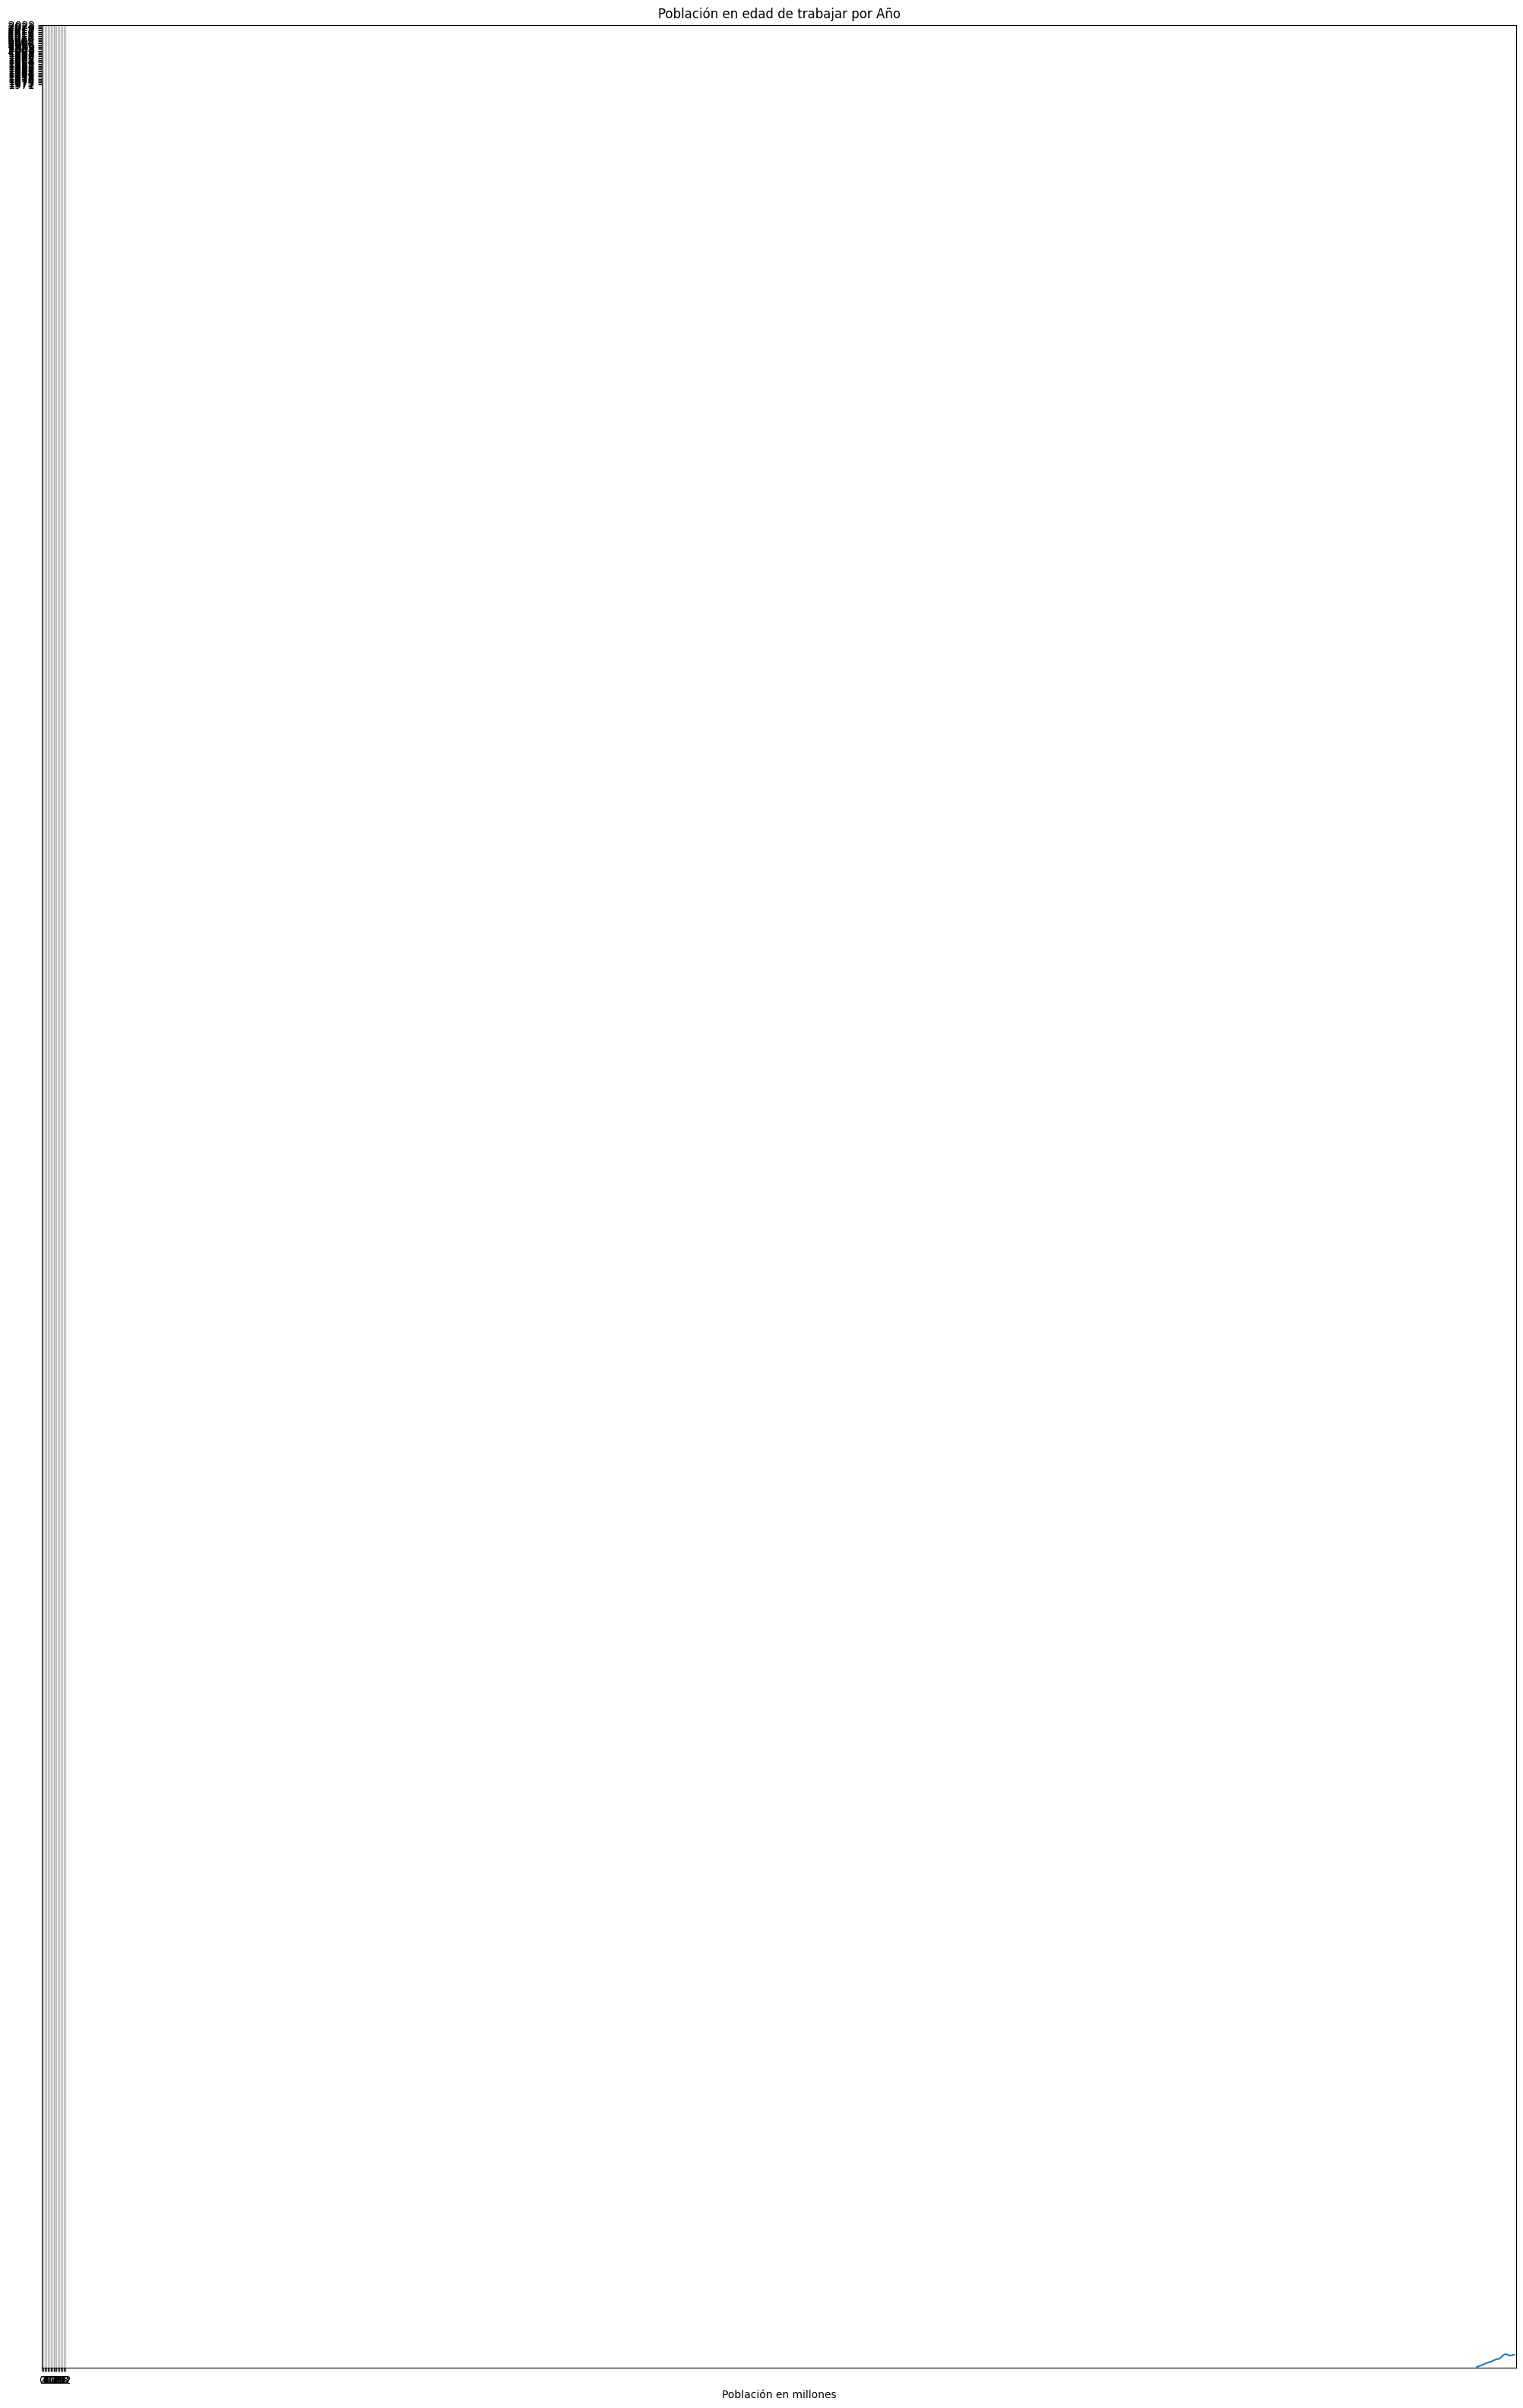

In [ ]:
fig, ax = plt.subplots(figsize = (25,40))

ax.plot(periodo, poblacionEdadTrabajarNormalizado)
ax.set_title('Población en edad de trabajar por Año')
ax.set_xlabel('Población en millones')
ax.grid(axis='x')

plt.yticks(np.arange(0,34,2))
plt.xticks(np.arange(1971,2023,1))

None

Ahora estudiaremos los porcentajes:

In [13]:
dataFramePobEdadTotal = dataFramePobEdad1[(dataFramePobEdad1['Edad'] == 'Total') & (dataFramePobEdad1['Provincias'] == 'Total Nacional') & (dataFramePobEdad1['Sexo'] == 'Ambos sexos')]

In [14]:
totalPoblacion = []
for total in dataFramePobEdadTotal['Total'].values:
    totalPoblacion.append(pasarAIntTotal(total))

In [15]:
porcentaje = []
for x,y in (zip(poblacionEdadTrabajar, totalPoblacion)):
    porcentaje.append(x*100/y)

NameError: name 'poblacionEdadTrabajar' is not defined

ValueError: x and y must have same first dimension, but have shapes (52,) and (0,)

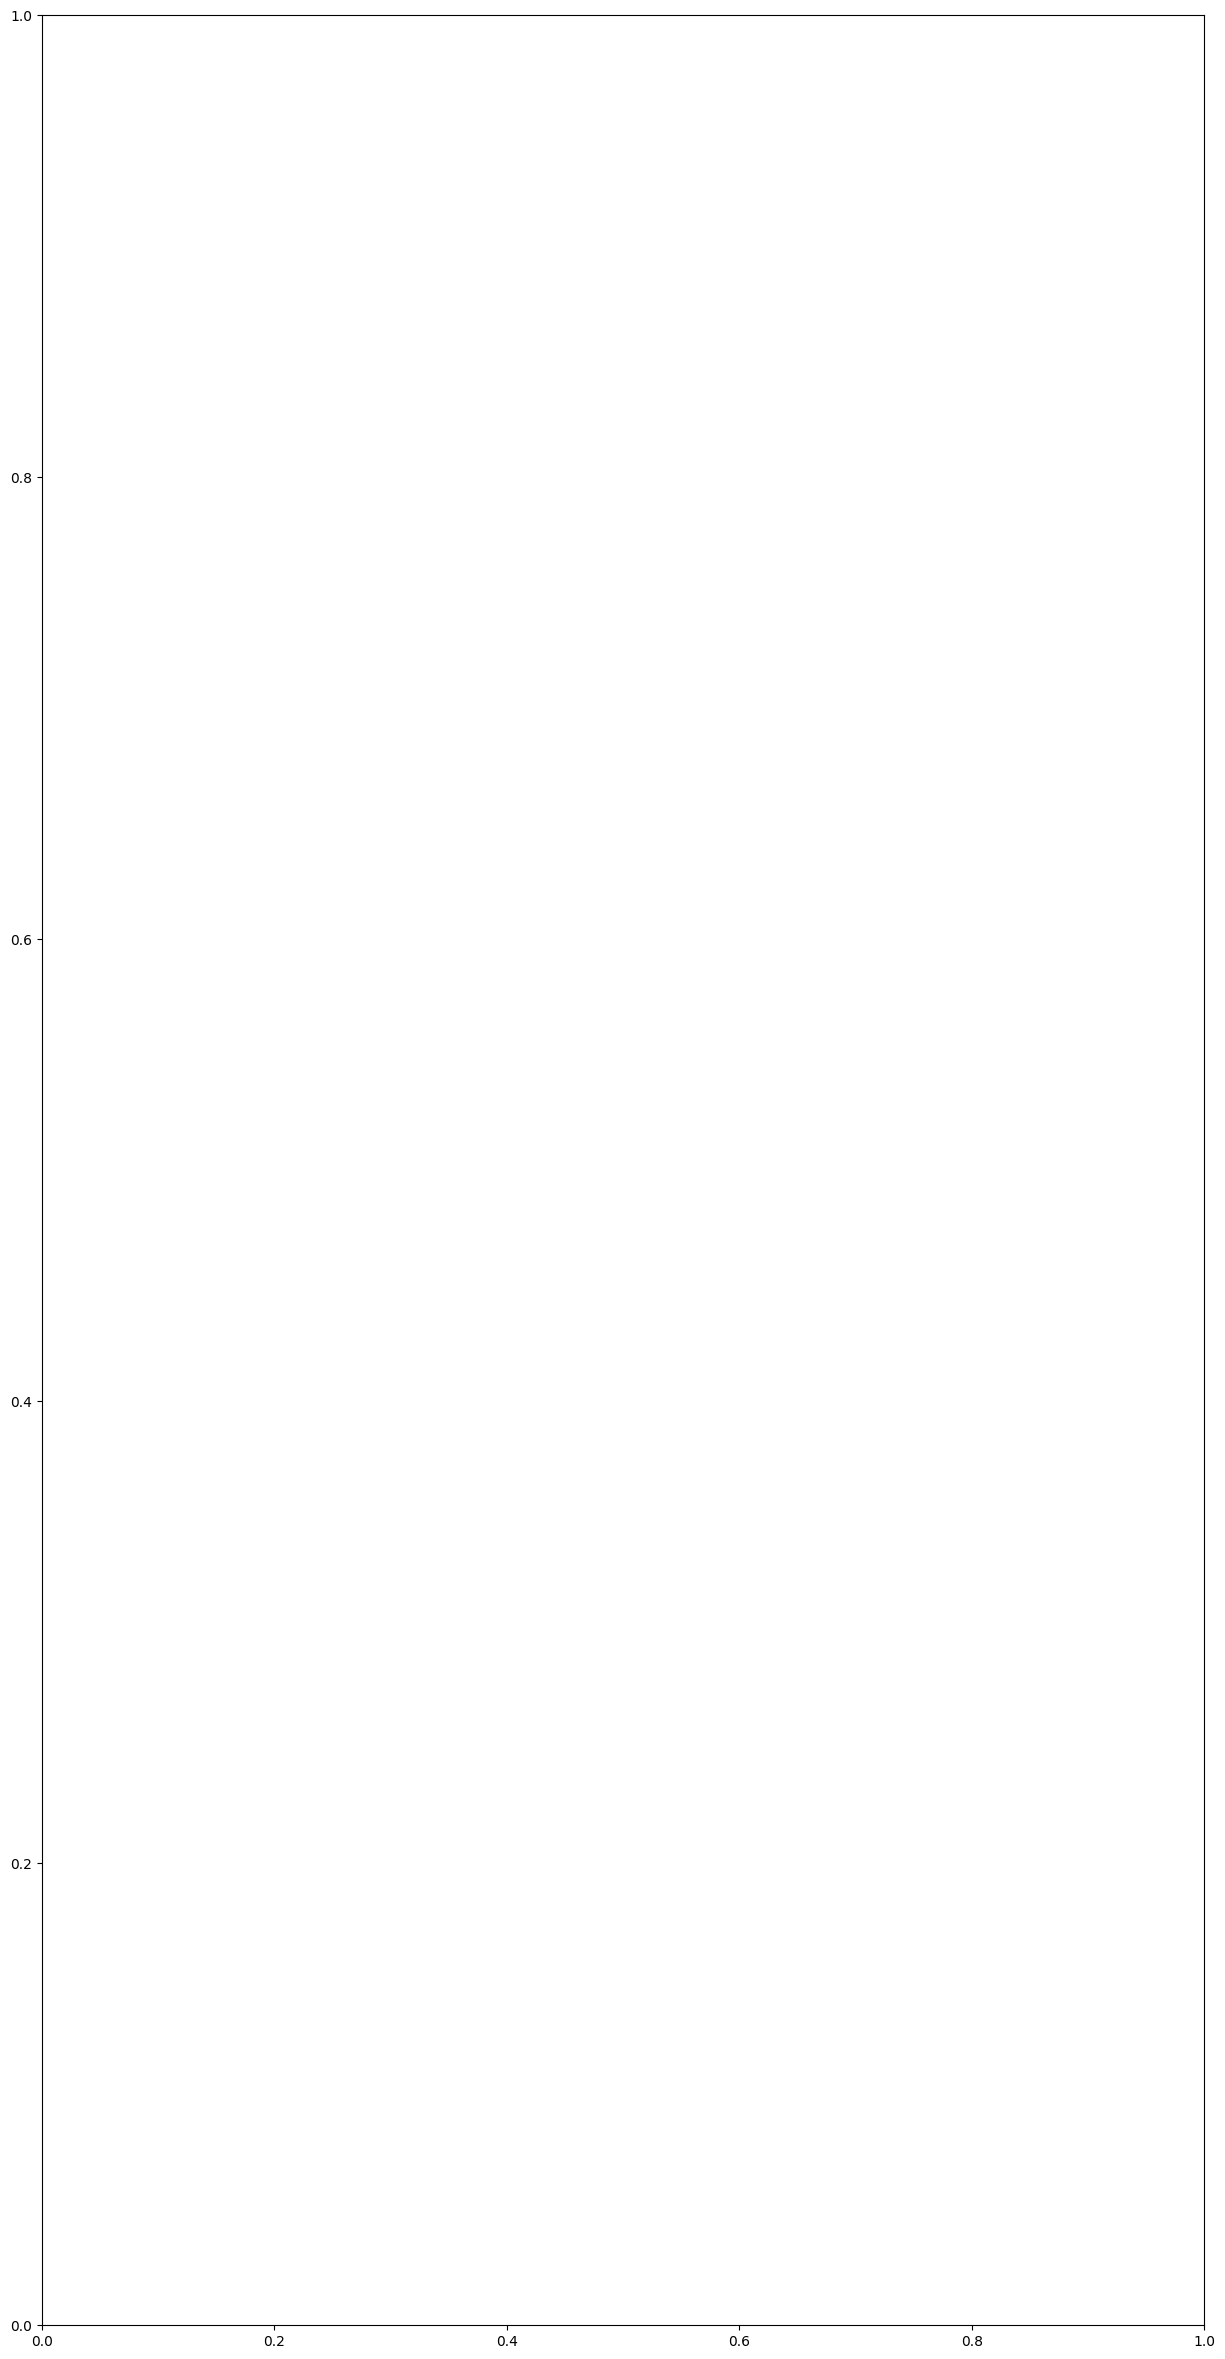

In [16]:
fig, ax = plt.subplots(figsize = (15,30))
ax.plot(periodo, porcentaje)
ax.set_title('Porcentaje de población en edad de trabajar por Año')
ax.set_xlabel('Porcentaje')
plt.yticks(np.arange(1971,2023,1))

None